In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats

/Users/christopher/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Import data from Costanzo et al (Science 2021).

In [2]:
df = pd.read_excel("data/Costanzo_et_al_Data File S1_Conditions_Strains_Fitness.xlsx",sheet_name=5)
df.head()

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [3]:
df.columns

Index(['Systematic Name', 'Gene Name', 'Allele (Essential genes only)',
       'Strain ID', 'on Diagnostic Array', 'Actinomycin D', 'Benomyl',
       'Boretzeomib', 'Caspofungin ', 'Concanmycin A', 'Cycloheximide',
       'Fluconozole', 'Galactose', 'Geldenamycin', 'MMS ', 'Monensin',
       'Rapamycin', 'Sorbitol', 'Tunicamycin'],
      dtype='object')

In [4]:
df = df.drop(['Allele (Essential genes only)','Systematic Name','Strain ID','on Diagnostic Array'],axis = 1)
df.head()

,Gene Name,Actinomycin D,Benomyl,Boretzeomib,Caspofungin,Concanmycin A,Cycloheximide,Fluconozole,Galactose,Geldenamycin,MMS,Monensin,Rapamycin,Sorbitol,Tunicamycin
0,TFC3,0.0050,0.1380,-0.0220,-0.0180,0.0280,-0.0080,0.0510,0.0400,-0.0250,0.0290,-0.0370,-0.0020,-0.0370,-0.0240
1,VPS8,-0.4890,-0.1980,-0.1150,-0.0360,-0.1320,-0.0450,-0.0270,-0.0940,-0.0670,-0.0520,-0.0330,-0.2965,-0.1115,-0.0850
2,NaN,-0.0245,-0.0525,-0.0145,-0.0045,-0.0535,-0.0275,-0.0145,-0.0225,0.0195,0.0025,-0.0085,0.1730,0.0870,-0.0005
3,SSA1,-0.0310,0.0100,-0.0150,0.0260,-0.0460,-0.0020,0.0750,-0.0250,-0.0040,-0.0130,-0.0230,0.2015,0.1265,0.0430
4,ERP2,-0.0315,0.0295,0.0215,-0.0505,0.0585,0.0205,0.0215,0.0145,0.0335,-0.0435,-0.0085,0.0835,-0.0265,-0.0105


In [5]:
df['Gene Name'] = df['Gene Name'].astype(str)
df = df[df['Gene Name']!='nan']
df.head()

,Gene Name,Actinomycin D,Benomyl,Boretzeomib,Caspofungin,Concanmycin A,Cycloheximide,Fluconozole,Galactose,Geldenamycin,MMS,Monensin,Rapamycin,Sorbitol,Tunicamycin
0,TFC3,0.0050,0.1380,-0.0220,-0.0180,0.0280,-0.0080,0.0510,0.0400,-0.0250,0.0290,-0.0370,-0.0020,-0.0370,-0.0240
1,VPS8,-0.4890,-0.1980,-0.1150,-0.0360,-0.1320,-0.0450,-0.0270,-0.0940,-0.0670,-0.0520,-0.0330,-0.2965,-0.1115,-0.0850
3,SSA1,-0.0310,0.0100,-0.0150,0.0260,-0.0460,-0.0020,0.0750,-0.0250,-0.0040,-0.0130,-0.0230,0.2015,0.1265,0.0430
4,ERP2,-0.0315,0.0295,0.0215,-0.0505,0.0585,0.0205,0.0215,0.0145,0.0335,-0.0435,-0.0085,0.0835,-0.0265,-0.0105
5,FUN14,0.0195,-0.0135,-0.0275,0.0315,0.0315,0.0335,-0.0515,0.0255,0.0555,0.0005,0.0225,0.0410,-0.0280,-0.0225


In [6]:
gene_names = df['Gene Name']
expr_arr = np.array(df.drop(['Gene Name'],axis=1))
del_avg = np.mean(expr_arr,axis =1)
df['Mean Perturbed Fitness'] = del_avg
df = df.sort_values('Mean Perturbed Fitness')
df.head()

,Gene Name,Actinomycin D,Benomyl,Boretzeomib,Caspofungin,Concanmycin A,Cycloheximide,Fluconozole,Galactose,Geldenamycin,MMS,Monensin,Rapamycin,Sorbitol,Tunicamycin,Mean Perturbed Fitness
3555,SIW14,0.0835,0.0985,-0.1305,0.1185,-0.2375,-0.2495,-0.2435,-0.5855,0.1185,-0.5225,-0.0245,-0.4015,-0.4985,-0.1865,-0.190071
482,RPN4,-0.1715,-0.2375,-0.6035,-0.0625,-0.3835,-0.0265,-0.1255,-0.1395,-0.1165,-0.0495,-0.0515,-0.2020,-0.1760,-0.1375,-0.177357
4406,VPS4,-0.4015,-0.1905,-0.0485,-0.2025,-0.1695,-0.0745,-0.1195,-0.1655,-0.2095,0.0255,-0.1565,-0.3800,-0.2290,-0.1435,-0.176071
3152,ERG6,-0.3175,-0.1485,-0.3795,-0.0305,-0.7825,-0.0665,-0.1535,0.0455,-0.0375,-0.0135,-0.1215,-0.2820,-0.0800,0.0055,-0.168714
808,NBP2,-0.1905,-0.2365,-0.0335,-0.1185,-0.2155,-0.1065,-0.1265,-0.4425,-0.1035,-0.0035,-0.0885,-0.3765,-0.0815,-0.2325,-0.168286


In [7]:
del_avg = np.mean(expr_arr,axis =1)

In [8]:
df_pairwise = pd.read_csv('data/SGA_NxN.txt',sep='\t')
df_pairwise.head()

,Query Strain ID,Query allele name,Array Strain ID,Array allele name,Arraytype/Temp,Genetic interaction score (ε),P-value,Query single mutant fitness (SMF),Array SMF,Double mutant fitness,Double mutant fitness standard deviation
0,YAL002W_sn273,vps8,YBL001C_dma94,ecm15,DMA30,0.1226,0.002185,0.7552,1.0112,0.8862,0.0327
1,YAL002W_sn273,vps8,YBL003C_dma93,hta2,DMA30,0.0269,0.242000,0.7552,1.0005,0.7825,0.0286
2,YAL002W_sn273,vps8,YBL005W_dma92,pdr3,DMA30,-0.0228,0.297900,0.7552,1.0248,0.7512,0.0343
3,YAL002W_sn273,vps8,YBL007C_dma91,sla1,DMA30,-0.0535,0.166300,0.7552,0.8230,0.5681,0.0525
4,YAL002W_sn273,vps8,YBL008W_dma90,hir1,DMA30,0.0532,0.071490,0.7552,0.9370,0.7608,0.0241


In [9]:
df_pairwise.columns

Index(['Query Strain ID', 'Query allele name', 'Array Strain ID',
       'Array allele name', 'Arraytype/Temp', 'Genetic interaction score (ε)',
       'P-value', 'Query single mutant fitness (SMF)', 'Array SMF',
       'Double mutant fitness', 'Double mutant fitness standard deviation'],
      dtype='object')

In [10]:
df_pairwise = df_pairwise[['Query allele name','Array allele name','\
Array SMF','Double mutant fitness']]
df_pairwise['Delta Double Mutant Fitness'] = df_pairwise['Double mutant fitness'] - df_pairwise['Array SMF']
df_pairwise.head()

,Query allele name,Array allele name,Array SMF,Double mutant fitness,Delta Double Mutant Fitness
0,vps8,ecm15,1.0112,0.8862,-0.1250
1,vps8,hta2,1.0005,0.7825,-0.2180
2,vps8,pdr3,1.0248,0.7512,-0.2736
3,vps8,sla1,0.8230,0.5681,-0.2549
4,vps8,hir1,0.9370,0.7608,-0.1762


In [11]:
smf_df = df_pairwise[['Query allele name']].drop_duplicates()
df_pairwise = df_pairwise[['Query allele name','Array allele name','Delta Double Mutant Fitness']]

In [12]:
df_pairwise['Array allele name'] = df_pairwise['Array allele name'].apply(str.upper)
df_pairwise['Query allele name'] = df_pairwise['Query allele name'].apply(str.upper)
smf_df['Query allele name'] = smf_df['Query allele name'].apply(str.upper)

In [13]:
smf_df = smf_df.reset_index()
smf_df = smf_df.drop('index',axis=1)
smf_df.head()

,Query allele name
0,VPS8
1,FUN14
2,SPO7
3,MDM10
4,SWC3


In [15]:
mean_pairwise_fitness = np.zeros(len(smf_df['Query allele name']))
for i in tqdm(range(0,len(mean_pairwise_fitness))):
    mean_pairwise_fitness[i] = np.mean(df_pairwise['Delta Double Mutant Fitness']\
                                       [df_pairwise['Query allele name']==smf_df['Query allele name'][i]])

100%|██████████| 3283/3283 [29:28<00:00,  1.86it/s]


In [16]:
smf_df["Mean Pairwise Fitness"] = mean_pairwise_fitness
smf_df.head()

,Query allele name,Mean Pairwise Fitness
0,VPS8,-0.237469
1,FUN14,0.027529
2,SPO7,-0.109481
3,MDM10,-0.359952
4,SWC3,-0.111851


In [17]:
env_df = df[['Mean Perturbed Fitness','Gene Name']]
env_df.head()

,Mean Perturbed Fitness,Gene Name
3555,-0.190071,SIW14
482,-0.177357,RPN4
4406,-0.176071,VPS4
3152,-0.168714,ERG6
808,-0.168286,NBP2


In [18]:
joint_df = env_df.set_index('Gene Name').join(smf_df.set_index('Query allele name'),how='inner')
joint_df.head()

,Mean Perturbed Fitness,Mean Pairwise Fitness
AAC1,0.007714,0.012519
AAC3,-0.018571,-0.035543
AAD4,-0.018786,-0.032852
AAP1,0.005071,0.000677
AAT1,-0.007500,-0.037729


In [46]:
joint_df.index[5]

'ABP1'

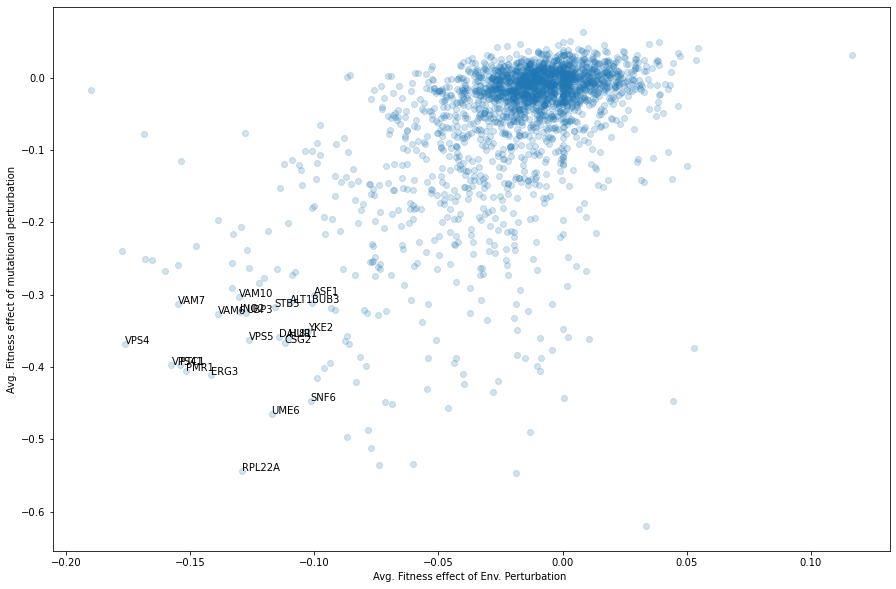

In [65]:
plt_1 = plt.figure(figsize=(15, 10))
plt.scatter(joint_df['Mean Perturbed Fitness'],joint_df['Mean Pairwise Fitness'],alpha = 0.2)
#ax.scatter(joint_df['Mean Perturbed Fitness']['HSP150'],joint_df['Mean Pairwise Fitness']['HSP150'])
for i in range(len(joint_df['Mean Perturbed Fitness'])):
        if joint_df['Mean Perturbed Fitness'][i] < -.1 and joint_df['Mean Pairwise Fitness'][i] < -.3:
            plt.annotate(joint_df.index[i], (joint_df['Mean Perturbed Fitness'][i], joint_df['Mean Pairwise Fitness'][i]))
plt.xlabel('Avg. Fitness effect of Env. Perturbation ')
plt.ylabel('Avg. Fitness effect of mutational perturbation')


plt.show()

In [26]:
mpf = np.array(joint_df['Mean Perturbed Fitness'])
dm2f = np.array(joint_df['Mean Pairwise Fitness'])
to_exclude = np.isnan(mpf)
mpf = mpf[~to_exclude]
dm2f = dm2f[~to_exclude]
scipy.stats.pearsonr(mpf,dm2f)

(0.5346298357674553, 2.7553514911286133e-164)

In [27]:
scipy.stats.spearmanr(mpf,dm2f)

SpearmanrResult(correlation=0.4558544126867034, pvalue=2.666151459088486e-114)

In [69]:
np.sum(np.isnan(np.array(joint_df['Delta Mean Pairwise Fitness'])))

0